<a href="https://colab.research.google.com/github/HoonC-corgi/Machine_Learning_SelfStudy/blob/main/06_2_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means 클래스

In [41]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2023-02-09 08:20:16--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-09 08:20:16--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-09 08:20:16--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [42]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [55]:
# k-평균 알고리즘은 사이킷런 클러스터 모듈 아래  구현되어 있음
# n_cluster 매개변수를 통해 클러스터 개수를 지정
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)   # 비지도 학습이므로 타깃 데이터가 없음

KMeans(n_clusters=3, random_state=42)

In [56]:
# 군집된 결과는 KMeans 클래스 객체의 labels_ 속성에 저장, labels_ 배열의 길이는 샘플 개수와 같음
print(km.labels_)
# 클러스터 개수를 3개로 지정했으므로, 배열은 0, 1, 2 중 하나로 설정 됨

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [57]:
print(np.unique(km.labels_, return_counts=True))
# 레이블 0, 첫 번째 클러스터가 91개의 샘플을, 레이블 2가 98개, 레이블 3이 111개의 샘플을 모았음

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [58]:
# 군집된 배열을 이미지로 출력하기 위해 유틸리티 함수 draw_fruits() 메소드 제작
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
  
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

  # draw_fruits() 메소드는 3차원 배열을 입력받아 가로로 10개씩 이미지를 출력,
  # 샘플 개수에 따라 행과 열의 개수를 계산하고 figsize를 지정
  # 2중 for 문을 사용하여 첫 쨰 행부터 이미지를 그림

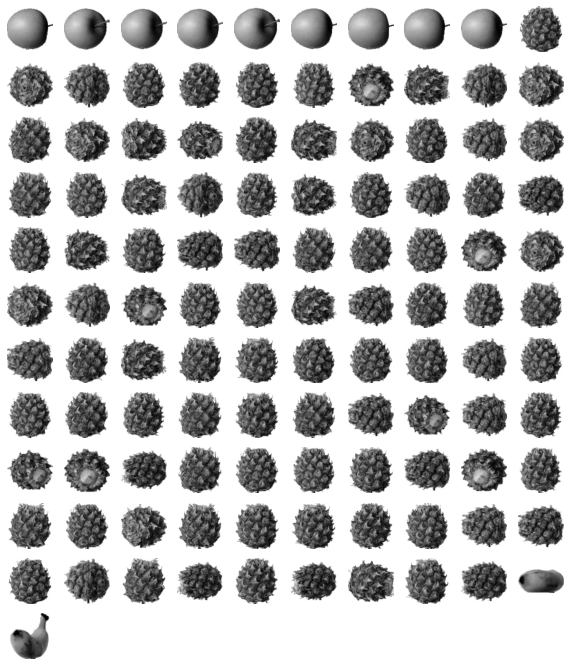

In [59]:
# 불리언 인덱싱을 사용하여 과일 사진을 모두 그리면,
# km.labels_==0과 같이 사용하면, 배열에서 값이 0인 위치는 True 아닌 것은 False가 됨
draw_fruits(fruits[km.labels_==0])

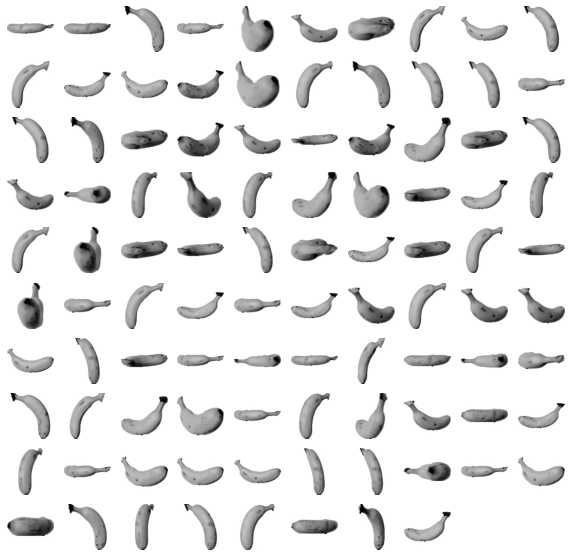

In [60]:
draw_fruits(fruits[km.labels_==1])

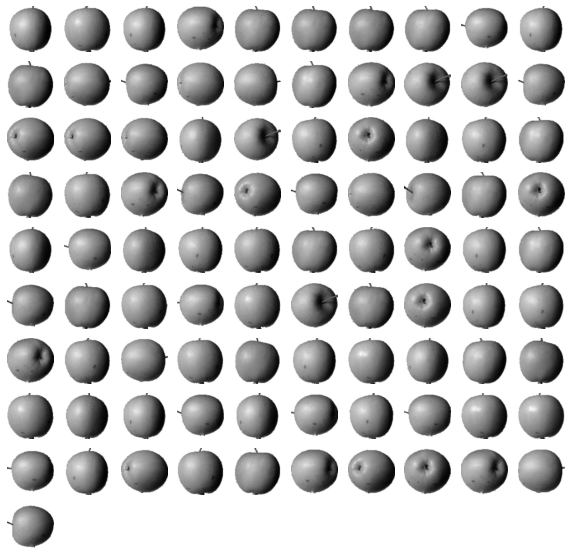

In [61]:
draw_fruits(fruits[km.labels_==2])

# 클러스터 중심

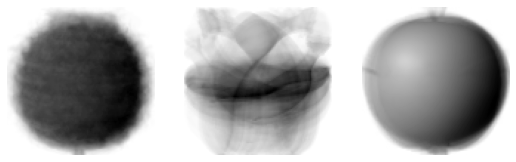

In [50]:
# KMeans 클래스가 최종적으로 찾은 클러스터 중심은 cluster_centers_ 속성에 저장됨
# 이 배열은 fruits_2d 샘플의 클러스터 중심이기에 각 중심을 이미지로 출력하려면 100 X 100 크기의 2차원 배열로 바꾸어야 함
draw_fruits(km.cluster_centers_.reshape(-1, 100,100), ratio = 3)

In [51]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [62]:
print(km.predict(fruits_2d[100:101]))

[0]


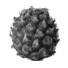

In [63]:
draw_fruits(fruits[100:101])

In [65]:
# 최적의 클러스터를 찾기 위해 클러스터의 중심을 옮긴 횟수, 즉 알고리즘의 반복 횟수
print(km.n_iter_)

4


# 최적의 K 찾기

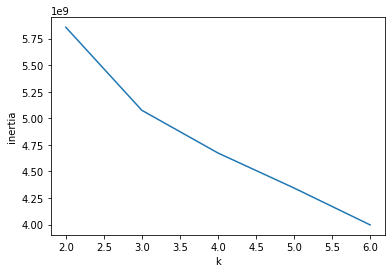

In [68]:
# KMeans 클래스의 inertia_ 속성에 이너셔 저장
inertia = []
for k in range(2, 7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()
# k=3이 베스트

# 전체 소스코드

# k-평균

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## KMeans 클래스

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-05-15 00:56:29--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-15 00:56:29--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-15 00:56:30--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [ ]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


In [ ]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

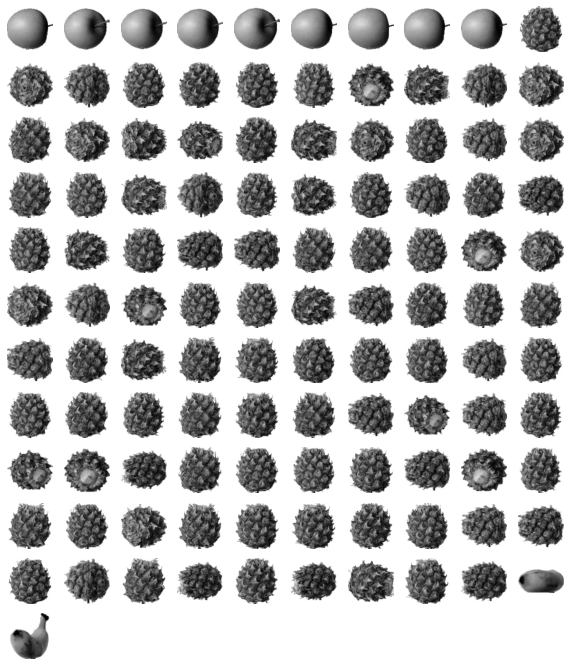

In [ ]:
draw_fruits(fruits[km.labels_==0])

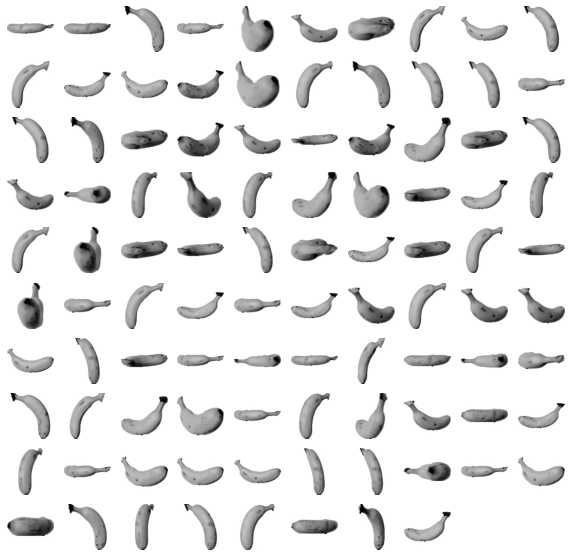

In [ ]:
draw_fruits(fruits[km.labels_==1])

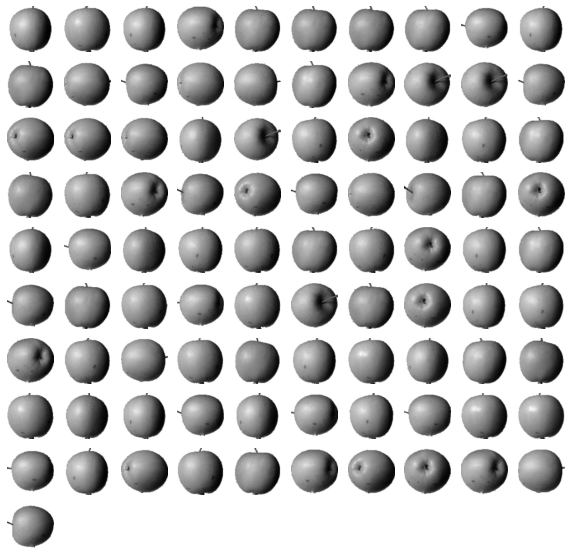

In [ ]:
draw_fruits(fruits[km.labels_==2])

## 클러스터 중심

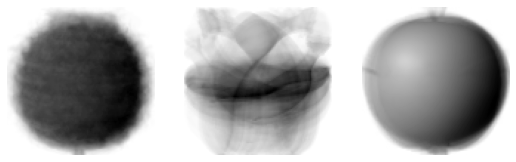

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [ ]:
print(km.transform(fruits_2d[100:101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [ ]:
print(km.predict(fruits_2d[100:101]))

[0]


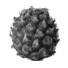

In [ ]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_)

4


## 최적의 k 찾기

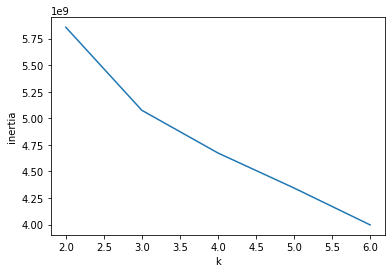

In [ ]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

# 총 정리
  ## 키워드
  ### K-평균 알고리즘
        랜덤하게 클러스터 중심을 정하고, 클러스터의 중심을 이동하면서 다시 클러스터를 만들어 가며 최적의 클러스터를 구성하는 알고리즘

  ### 클러스터 중심(센트로이드)
        k-평균 알고리즘이 만든 클러스터에 속한 샘플의 특성 평균값, 가장 가까운 클러스터 중심을 샘플의 또 다른 특성으로 사용하거나 새로운 샘플에 대한 예측으로 활용할 수 있음

  ### 엘보우 방법
        최적의 클러스터 개수를 정하는 방법
        이너셔는 클러스터 중심과 샘플 사이 거리의 제곱 합
        클러스터 개수에 따라 이너셔 감소가 꺾이는 지점이 최적의 클러스터 개수 K

  ## 핵심 패키지와 함수
  ### 사이킷런
  ### KMeans
        k-평균 알고리즘 클래스
        n_clusters에 클러스터 개수를 지정, 디폴트는 8
        n_init은 알고리즘 반복 횟수를 지정, 디폴트는 10
        max_iter는 K-평균 알고리즘의 한 번 실행에서 최적의 센트로이드를 찾기 위해 반복할 수 있는 최대 횟수로, 디폴트는 200


# 팁
  ## K-평균 알고리즘
      1. 무작위로 k개의 클러스터 중심을 정함
      2. 각샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
      3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경
      4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복

  ## labels_ 속성
      샘플이 소속된 클러스터의 정보가 저장되어 있음

  ## 엘보우
      k-평균 알고리즘은 클러스터 개수를 미리 지정해야 함
      최적의 클러스터 개수를 알기 위해 클러스터 개수를 늘리며 반복하고 이너셔 감소치가 꺾이는 구간을 최적의 클러스터 개수로 결정
      이너셔는 inertia_ 속성에 저장되어 있음

      ex)
      inertia = []
      for k in range(2, 7):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(fruits_2d)
        inertia.append(km.inertia_)

      plt.plot(range(2, 7), inertia)
      plt.xlabel('k')
      plt.ylabel('inertia')
      plt.show()